In [1]:
import enum, random

# An Enum is a typed set of enumerated values, We can use them to make our code more descriptive & redable

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() ->Kid:
    return random.choice([Kid.BOY,Kid.GIRL])

both_girls = 0
older_girls = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()

    if older == Kid.GIRL:
        older_girls +=1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls +=1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl +=1

print("P(both | older): ", both_girls / older_girls)
print("P(both | either): ", both_girls / either_girl)

P(both | older):  0.5007089325501317
P(both | either):  0.3311897106109325


# The Normal distribution

In [1]:
import math 

SQRT_TWO_PI = math.sqrt(2*math.pi)

def normal_pdf(x:float, mu:float = 0, sigma:float = 1) -> float:
    # Calculates the Normal distrubution 
    return (math.exp(-(x-mu)**2 / 2 / sigma**2) / SQRT_TWO_PI * sigma)

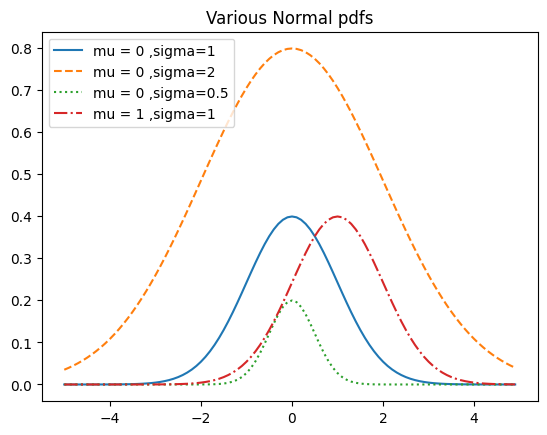

In [3]:
import matplotlib.pyplot as plt 

xs = [x /10.0 for x in range(-50,50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label = 'mu = 0 ,sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label = 'mu = 0 ,sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label = 'mu = 0 ,sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=1) for x in xs], '-.', label = 'mu = 1 ,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

# Cummlative Density Function

In [4]:
def normal_cdf( x:float, mu:float = 0, sigma: float = 1) -> float:
    return (1 + math.erf( (x - mu) / math.sqrt(2) / sigma )) /2


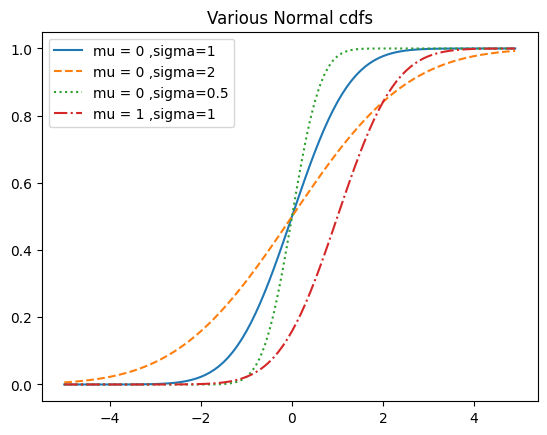

In [5]:
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label = 'mu = 0 ,sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label = 'mu = 0 ,sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label = 'mu = 0 ,sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=1) for x in xs], '-.', label = 'mu = 1 ,sigma=1')
plt.legend()
plt.title("Various Normal cdfs")
plt.show()

# Inverse Normal CDF

In [6]:
def inverse_normal_cdf( p:float,
                        mu:float =0,
                        sigma: float =1,
                        tolerance: float = 0.00001) ->float:
    """  Find the aproximate inverse using binary search"""

    # if not standard, compute standard & rescale
    if mu!=0 or sigma !=1:
        return mu + sigma * inverse_normal_cdf(p,tolerance=tolerance)
    
    low_z = -10.0       # normal_cdf(-10) is very close to 0
    hi_z = 10.0         # normal_cdf(10) is very close to 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2      # Consider the mid-point
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        else:
            hi_z = mid_z

    return mid_z

# Bernoulli Trial 

In [7]:
def bernoulli_trial(p: float) -> int:
    """ Returns 1 with probabitlity p and 0 with probabitlity 1-p """
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """ Returns the sum of n_bernoulli(p) for _ in range(n) """

    return sum(bernoulli_trial(p) for _ in range(n))



In [10]:
from collections import Counter 
import random
def binomial_hostogram(p:float, n:int, num_points: int) -> None:
    """ picks points from a Binomial(n,p) and plots their histogram """

    data = [binomial(n,p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color = '0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1- p))

    # use a line chart to show the nominal approximation
    xs = range(min(data),max(data)+1)
    ys = [normal_cdf( i + 0.5 , mu, sigma) - normal_cdf(i -0.5, mu , sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title(" Binomial Distribution vs Normal Approximation")
    plt.show()

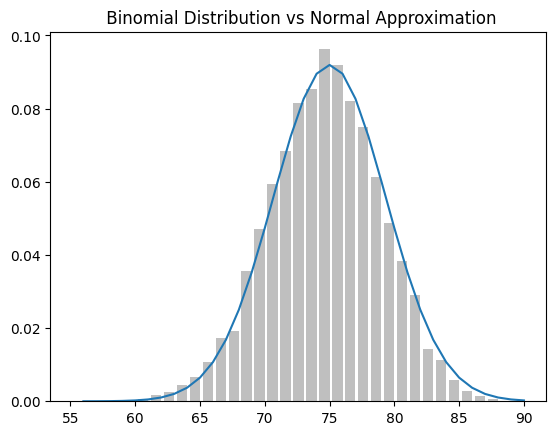

In [11]:
binomial_hostogram(.75, 100, 10000)